In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/kushjayankpandya/SEM-6-Minor-Project/master/Dataset_spine.csv')

In [3]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
df.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')

In [5]:
df=df.drop(['Unnamed: 13'],axis=1)

In [6]:
df.rename(columns = {'Col1':'pelvic_incidence', 'Col2':'pelvic_tilt', 
                     'Col3':'lumbar_lordosis_angle', 'Col4':' sacral_slope',
                     'Col5':'pelvic_radius', 'Col6':'degree_spondylolisthesis',
                     'Col7':'pelvic_slope', 'Col8':'Direct_tilt',
                     'Col9':' thoracic_slope', 'Col10':'cervical_tilt',
                     'Col11':'sacrum_angle', 'Col12':'scoliosis_slope'}, inplace = True) 

In [7]:
from sklearn import preprocessing
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
le=preprocessing.LabelEncoder().fit(df['Class_att'])

In [9]:
df['Class_att'].describe()

count          310
unique           2
top       Abnormal
freq           210
Name: Class_att, dtype: object

plt.scatter(x = df["Col1"],y = df["Col2"],color = "black")
x = df["Col1"]
y = df["Col2"]
plt.xlabel("Pelvic Incidence")
plt.ylabel("Pelvic Tilt")

In [10]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [11]:
len(df)

310

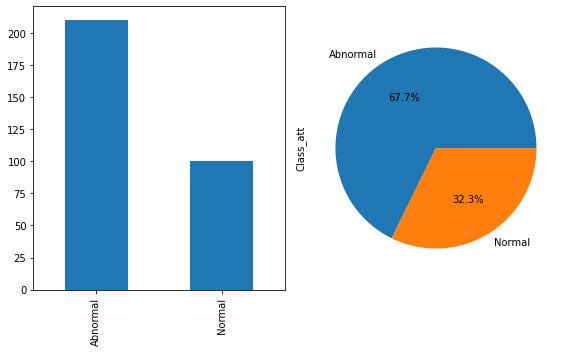

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [12]:
fig, axarr=plt.subplots(nrows=1,ncols=2, figsize=(8,5))
     
df["Class_att"].value_counts().plot(kind="bar",ax=axarr[0])
df["Class_att"].value_counts().plot.pie(autopct="%1.1f%%",ax=axarr[1])


plt.tight_layout()
plt.show()
df.loc[:,'Class_att'].value_counts()

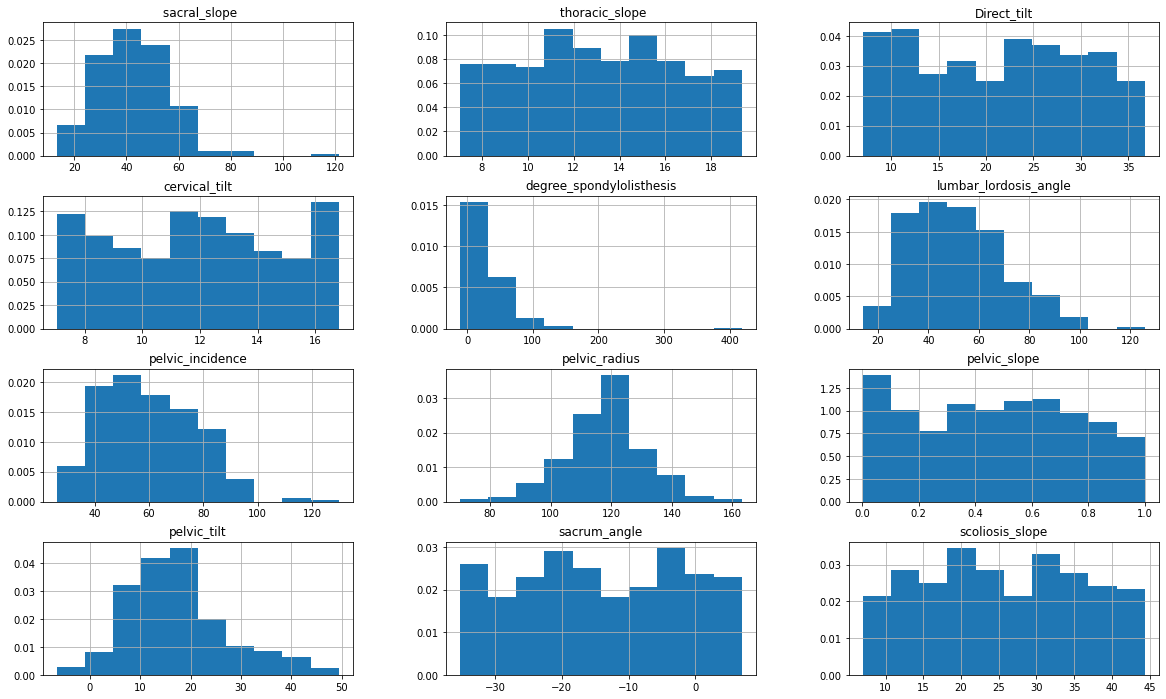

In [13]:
df.hist(bins=10, density=True, figsize=(20,12))
plt.show()

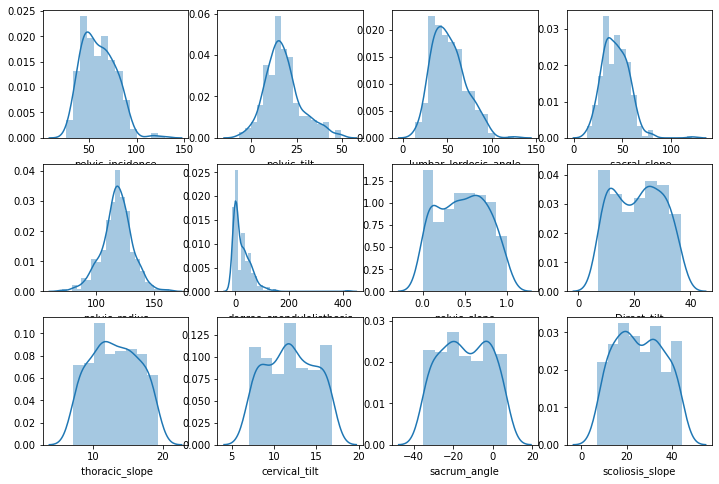

In [14]:
fig, ax=plt.subplots(nrows=3, ncols=4,figsize=(12,8))
ax=ax.flatten()
col_names=df.drop('Class_att', axis=1).columns.values

for i,col_name in enumerate(col_names):
    sns.distplot(a=df[col_name], ax=ax[i])


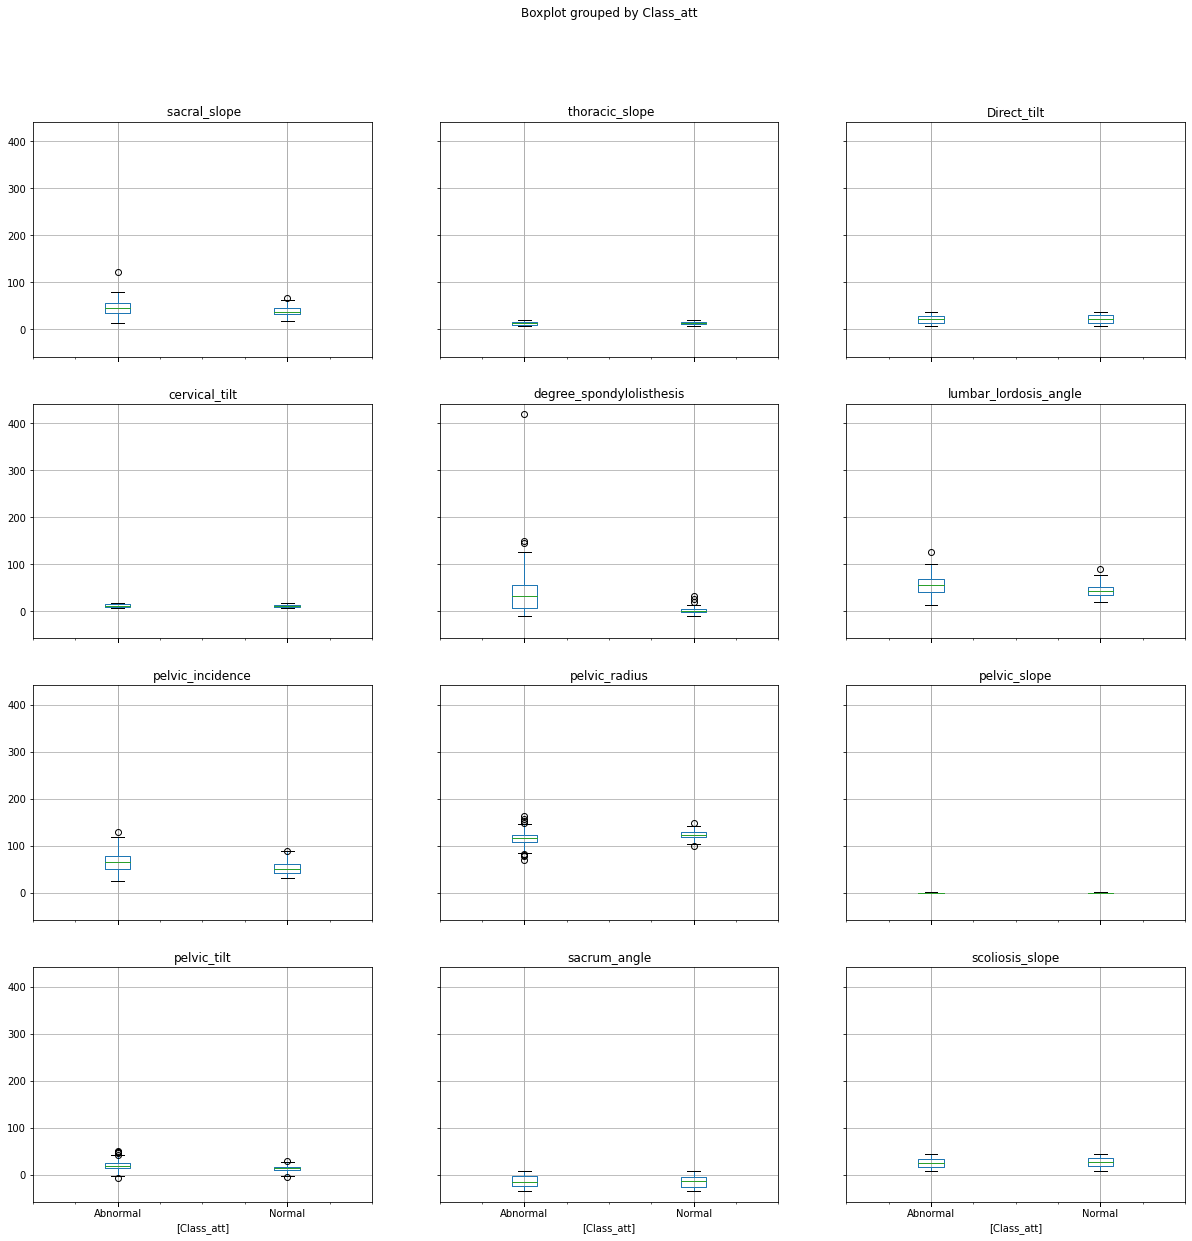

In [15]:
df.boxplot(figsize=(20,20),by="Class_att",grid=True)
plt.show()


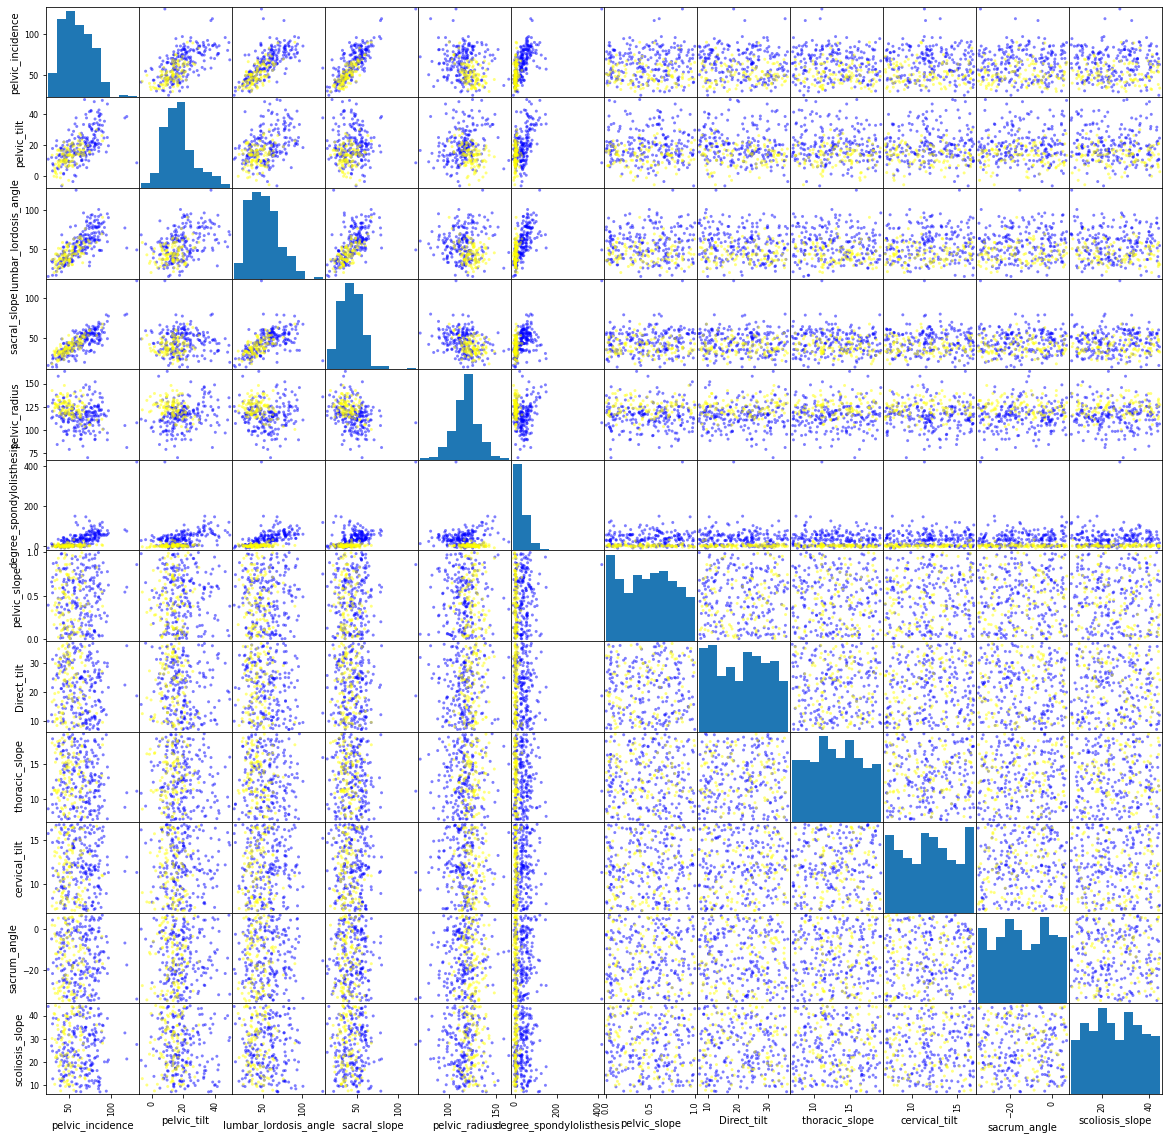

In [16]:
color_list = ['blue' if i=='Abnormal' else 'yellow' for i in df.loc[:,'Class_att']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'Class_att'],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=0.5
                                       )
plt.show()

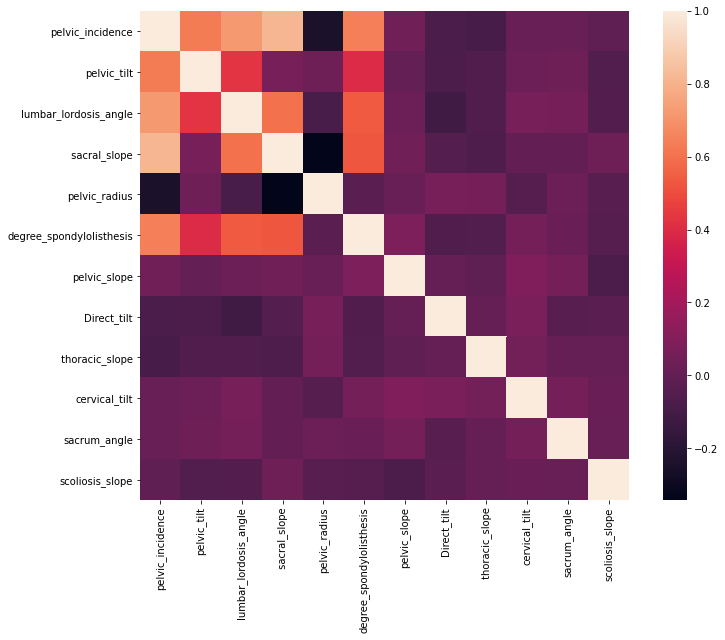

In [17]:
mat=df.corr()
f, ax= plt.subplots(figsize=(12, 9))
sns.heatmap(mat, vmax=1, square=True);

In [18]:
df=df.sample(frac=1)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
190,43.718262,9.811985,52.000000,33.906277,88.434242,40.880923,0.811098,10.6583,16.9317,9.51271,-8.828259,12.1023,Abnormal
168,95.382596,24.822631,95.157633,70.559965,89.307547,57.660841,0.268276,28.6901,7.2124,13.13055,-6.412477,19.9792,Abnormal
193,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,0.163595,9.0344,11.9015,7.54207,-5.956620,43.8608,Abnormal
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0.990034,26.6333,18.3694,16.44832,-13.438814,34.2846,Normal
229,43.436451,10.095743,36.032224,33.340707,137.439694,-3.114451,0.283589,36.0097,11.0132,8.51675,-23.904190,35.0749,Normal


In [19]:
df.describe(include=['O'])

,Class_att
count,310
unique,2
top,Abnormal
freq,210


In [20]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
 sacral_slope               0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
 thoracic_slope             0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

In [21]:
most_occ = pd.get_dummies(df['Class_att']).sum().sort_values(ascending=False).index[0]
def replace_nan(x):
    if pd.isnull(x):
        return most_occ
    else:
        return x

df['Class_att'] = df['Class_att'].map(replace_nan)

In [22]:
X,y=df.iloc[:,:-2],df.iloc[:,-1]

In [23]:
from plotly.offline import iplot
import plotly.graph_objs as gph

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
model = DecisionTreeClassifier(random_state=0,)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
y_list=list(y_test)
y_pred=model.predict(X_test, y_list)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_list,normalize=False)/len(y_test)

0.7475728155339806

In [30]:
Depth = np.arange(1,10)
train_acc = []
test_acc = []
for i in range(1,10):
    model = DecisionTreeClassifier(random_state=0,max_depth=i)
    model.fit(X_train, y_train)
    y_list=list(y_train)
    
    print(f"for {i} depth",end='  ')
    train_accuracy= model.score(X_train,y_train)
    test_accuracy= model.score(X_test,y_test)
    train_acc.append(model.score(X_train, y_train))           
    test_acc.append(model.score(X_test, y_test))
    print("Train Accuracy -",model.score(X_train, y_train),end='  ')
    print("Test Accuracy -",model.score(X_test, y_test))
    

for 1 depth  Train Accuracy - 0.782608695652174  Test Accuracy - 0.7864077669902912
for 2 depth  Train Accuracy - 0.8309178743961353  Test Accuracy - 0.7378640776699029
for 3 depth  Train Accuracy - 0.893719806763285  Test Accuracy - 0.7864077669902912
for 4 depth  Train Accuracy - 0.927536231884058  Test Accuracy - 0.7475728155339806
for 5 depth  Train Accuracy - 0.9565217391304348  Test Accuracy - 0.7572815533980582
for 6 depth  Train Accuracy - 0.9806763285024155  Test Accuracy - 0.7572815533980582
for 7 depth  Train Accuracy - 0.9903381642512077  Test Accuracy - 0.7475728155339806
for 8 depth  Train Accuracy - 1.0  Test Accuracy - 0.7475728155339806
for 9 depth  Train Accuracy - 1.0  Test Accuracy - 0.7475728155339806


In [31]:
trace1 = gph.Scatter(
                    x = Depth,
                    y = train_acc,
                    mode = "lines+markers",
                    name = "Train accuracy",
                    marker = dict(color = 'green'),
                    text= "Train accuracy")

trace2 = gph.Scatter(
                    x = Depth,
                    y = test_acc,
                    mode = "lines+markers",
                    name = "Test accuracy",
                    marker = dict(color = 'orange'),
                    text= "Test accuracy")
data = [trace1, trace2]
layout = dict(title = 'Depth vs Accuracy',
              xaxis= dict(title= 'Depth',ticklen= 10,zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

print("The best accuracy is {} with Depth = {}".format(np.max(test_acc), 1+test_acc.index(np.max(test_acc))))

The best accuracy is 0.7864077669902912 with Depth = 1


In [32]:
data = [gph.Bar(
            x=["Decision Tree Train Accuracy","Decision Tree Test Accuracy"],
            y=[model.score(X_train, y_train),model.score(X_test, y_test)],
            marker=dict(color='cyan',
            line=dict(color='black',
            width=1),
        )
    )]

iplot(data)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
Depth = np.arange(1,10)
train_acc = []
test_acc = []
for i in range(1,10):
    model = RandomForestClassifier(random_state=0,max_depth=i)
    model.fit(X_train, y_train);
    y_list=list(y_train)
    train_acc.append(model.score(X_train, y_train))           
    test_acc.append(model.score(X_test, y_test))
    print(f"for {i} depth",end='  ')
    train_acc.append(model.score(X_train, y_train))           
    test_acc.append(model.score(X_test, y_test))
    print("Train Accuracy -",model.score(X_train, y_train),end='  ')
    print("Test Accuracy -",model.score(X_test, y_test))

for 1 depth  Train Accuracy - 0.7729468599033816  Test Accuracy - 0.7378640776699029
for 2 depth  Train Accuracy - 0.893719806763285  Test Accuracy - 0.7475728155339806
for 3 depth  Train Accuracy - 0.9178743961352657  Test Accuracy - 0.7766990291262136
for 4 depth  Train Accuracy - 0.961352657004831  Test Accuracy - 0.8058252427184466
for 5 depth  Train Accuracy - 0.9710144927536232  Test Accuracy - 0.8058252427184466
for 6 depth  Train Accuracy - 1.0  Test Accuracy - 0.8252427184466019
for 7 depth  Train Accuracy - 1.0  Test Accuracy - 0.8155339805825242
for 8 depth  Train Accuracy - 1.0  Test Accuracy - 0.8252427184466019
for 9 depth  Train Accuracy - 1.0  Test Accuracy - 0.8349514563106796


In [35]:
trace1 = gph.Scatter(
                    x = Depth,
                    y = train_acc,
                    mode = "lines+markers",
                    name = "Train accuracy",
                    marker = dict(color = 'green'),
                    text= "Train accuracy")

trace2 = gph.Scatter(
                    x = Depth,
                    y = test_acc,
                    mode = "lines+markers",
                    name = "Test accuracy",
                    marker = dict(color = 'orange'),
                    text= "Test accuracy")
data = [trace1, trace2]
layout = dict(title = 'Depth vs Accuracy',
              xaxis= dict(title= 'Depth',ticklen= 10,zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

print("The best accuracy is {} with Depth = {}".format(np.max(test_acc), 1+test_acc.index(np.max(test_acc))))

The best accuracy is 0.8349514563106796 with Depth = 17


In [36]:
data = [gph.Bar(
            x=["Random Forest Train Accuracy","Random Forest Test Accuracy"],
            y=[model.score(X_train, y_train),model.score(X_test, y_test)],
            marker=dict(color='cyan',
            line=dict(color='black',
            width=1),
        )
    )]

iplot(data)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train);
y_list=list(y_train)
y_pred=model.predict(X_train)
print("Train Accuracy -",model.score(X_train, y_train),end='  ')
print("Test Accuracy -",model.score(X_test, y_test))
    

Train Accuracy - 1.0  Test Accuracy - 0.8155339805825242


In [39]:
data = [gph.Bar(
            x=["Gradient Boosting Train Accuracy","Gradient Boosting Test Accuracy"],
            y=[model.score(X_train, y_train),model.score(X_test, y_test)],
            marker=dict(color='cyan',
            line=dict(color='black',
            width=1),
        )
    )]

iplot(data)

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
model = MLPClassifier(solver='lbfgs',activation='logistic',max_iter=100, hidden_layer_sizes=(8,6,2), random_state=1)
model.fit(X_train, y_train);
y_list=list(y_train)
print("Train Accuracy -",model.score(X_train, y_train),end='  ')
print("Test Accuracy -",model.score(X_test, y_test))
    

Train Accuracy - 0.8840579710144928  Test Accuracy - 0.7864077669902912


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [42]:
data = [gph.Bar(
            x=["MLP Train Accuracy","MLP Test Accuracy"],
            y=[model.score(X_train, y_train),model.score(X_test, y_test)],
            marker=dict(color='cyan',
            line=dict(color='black',
            width=1),
        )
    )]

iplot(data)

In [43]:
from sklearn.svm import SVC

In [44]:
model = SVC(gamma='auto')
model.fit(X_train, y_train);
y_list=list(y_train)
#print(f"for {i*0.0001} regularization",end='  ')
print("Train Accuracy -",model.score(X_train, y_train),end='  ')
print("Test Accuracy -",model.score(X_test, y_test))

Train Accuracy - 0.6763285024154589  Test Accuracy - 0.6796116504854369


In [45]:
model.score(X_train, y_train)

0.6763285024154589

In [46]:
data = [gph.Bar(
            x=["SVC Train Accuracy","SVC Test Accuracy"],
            y=[model.score(X_train, y_train),model.score(X_test, y_test)],
            marker=dict(color='cyan',
            line=dict(color='black',
            width=1),
        )
    )]

iplot(data)

In [47]:
from sklearn.neighbors import KNeighborsClassifier


In [48]:
Neighbor = np.arange(1,15)
train_accuracy = []
test_accuracy = []
for i in range(1,16):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train);
    y_list=list(y_train)
    train_accuracy.append(model.score(X_train, y_train))           
    test_accuracy.append(model.score(X_test, y_test))
    print(f"for {i} neighbour",end='  ')
    print("Train Accuracy -",model.score(X_train, y_train),end='  ')
    print("Test Accuracy -",model.score(X_test, y_test))

for 1 neighbour  Train Accuracy - 1.0  Test Accuracy - 0.6407766990291263
for 2 neighbour  Train Accuracy - 0.7922705314009661  Test Accuracy - 0.6796116504854369
for 3 neighbour  Train Accuracy - 0.821256038647343  Test Accuracy - 0.6601941747572816
for 4 neighbour  Train Accuracy - 0.7681159420289855  Test Accuracy - 0.6893203883495146
for 5 neighbour  Train Accuracy - 0.8115942028985508  Test Accuracy - 0.6796116504854369
for 6 neighbour  Train Accuracy - 0.7536231884057971  Test Accuracy - 0.6699029126213593
for 7 neighbour  Train Accuracy - 0.7681159420289855  Test Accuracy - 0.6407766990291263
for 8 neighbour  Train Accuracy - 0.782608695652174  Test Accuracy - 0.6893203883495146
for 9 neighbour  Train Accuracy - 0.7922705314009661  Test Accuracy - 0.6504854368932039
for 10 neighbour  Train Accuracy - 0.7681159420289855  Test Accuracy - 0.6893203883495146
for 11 neighbour  Train Accuracy - 0.7681159420289855  Test Accuracy - 0.6407766990291263
for 12 neighbour  Train Accuracy - 0

In [49]:
trace1 = gph.Scatter(
                    x = Neighbor,
                    y = train_accuracy,
                    mode = "lines+markers",
                    name = "Train accuracy",
                    marker = dict(color = 'green'),
                    text= "Train accuracy")

trace2 = gph.Scatter(
                    x = Neighbor,
                    y = test_accuracy,
                    mode = "lines+markers",
                    name = "Test accuracy",
                    marker = dict(color = 'orange'),
                    text= "Test accuracy")
data = [trace1, trace2]
layout = dict(title = 'K Value vs Accuracy',
              xaxis= dict(title= 'Number of Neighbours',ticklen= 10,zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

knn_train_accuracy = np.max(train_accuracy)
knn_test_accuracy = np.max(test_accuracy)
print("The best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

The best accuracy is 0.6893203883495146 with K = 4


In [50]:
data = [gph.Bar(
            x=["KNN Train Accuracy","KNN Test Accuracy"],
            y=[knn_train_accuracy,knn_test_accuracy],
            marker=dict(color='cyan',
            line=dict(color='black',
            width=1),
        )
    )]

iplot(data)

In [51]:
import tensorflow as tf
import numpy as np
X_tf=np.array(X_train)
y_tf=le.transform(y_train)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  #tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#
history = model.fit(X_tf, y_tf, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
#model.fit(X_tf, y_tf, epochs=100)
model.fit(X_tf, y_tf, validation_split=0.33, epochs=100)
X_tf=np.array(X_test)
y_tf=le.transform(y_test)
test_loss, test_acc = model.evaluate(X_tf, y_tf, verbose=2)
print(test_acc)

Epoch 1/100
5/5 [==============================] - 0s 10ms/step - loss: 0.1841 - accuracy: 0.6522 - val_loss: 0.1825 - val_accuracy: 0.6957
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.6522 - val_loss: 0.1825 - val_accuracy: 0.6957
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1839 - accuracy: 0.6522 - val_loss: 0.1824 - val_accuracy: 0.6957
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1838 - accuracy: 0.6594 - val_loss: 0.1823 - val_accuracy: 0.6957
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1837 - accuracy: 0.6522 - val_loss: 0.1822 - val_accuracy: 0.6957
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.6522 - val_loss: 0.1820 - val_accuracy: 0.7101
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1834 - accuracy: 0.6522 - val_loss: 0.1819 - val_accuracy: 0.7101
Epoch 8/100
5/5 [=========

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


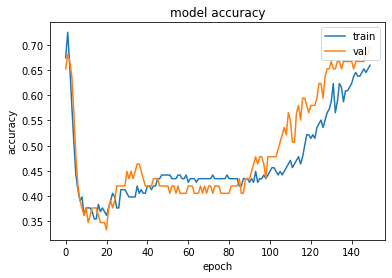

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

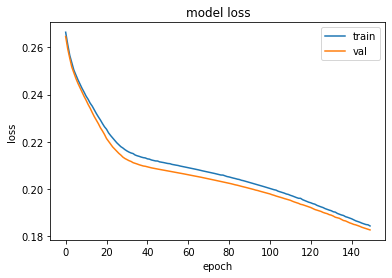

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [55]:
X_tf=np.array(X)
y_tf=le.transform(y)
print(model.evaluate(X_tf, y_tf,verbose=2))

10/10 - 0s - loss: 0.3081 - accuracy: 0.7484
[0.30811190605163574, 0.7483870983123779]
